In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# load data
capstone_df = pd.read_excel('./Capstone Dataset 20210608-183000.xlsx')
capstone_df

In [ ]:
portrait_df = capstone_df[['Ref',
 'Application Ref',
 'Sex',
 'Gender Identity',
 'Birth State',
 'Birth Country',
 'Age at App Submission',
 'Age',
 'Native Language',
 'Citizenship',
 'Area of Interest',
 'Career Plan',
 'Application Year',
 'Previously Applied?',
 'Current Student?',
 'Currently Employed?',
 'Created',
 'Updated',
 'Submitted']]

In [ ]:
portrait_df['submission_date'] = portrait_df['Submitted'].apply(lambda x: str(x.date()))
portrait_df

### When do applicants finish their applications?

In [ ]:
filtered_portrait_df = portrait_df[portrait_df['Birth Country'].isin(['US', 'CH', 'IN'])]
date_filtered = filtered_portrait_df[filtered_portrait_df['submission_date'].between('2019-11', '2020-03', inclusive='both')]
count_portrait_df = date_filtered.groupby(['submission_date', 'Birth Country'])['submission_date'].count().to_frame(name='submission_num').reset_index()
count_portrait_df['submission_date'] = count_portrait_df['submission_date'].apply(lambda x: np.datetime64(x, 'D'))
count_portrait_df

In [ ]:
# my_pred = count_portrait_df.to_csv()

In [ ]:
import matplotlib.dates as mdates
datemin = np.datetime64('2019-11', 'D')
datemax = np.datetime64('2020-03', 'D')

In [ ]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() # every day
dates_fmt = mdates.DateFormatter('%Y-%m-%d')
count_portrait_df['submission_date'] = count_portrait_df['submission_date'].apply(lambda x: np.datetime64(x, 'D'))

In [ ]:
# Submission number between 2019-11 and 2020-03

plt.figure(figsize=(12,12))

colors = ['purple', 'orange',  'red']
ax = sns.lineplot(data=count_portrait_df, x="submission_date", y="submission_num", hue='Birth Country',palette=colors)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dates_fmt)
ax.xaxis.set_minor_locator(days)

ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.axvline(np.datetime64('2019-12-25'), linestyle = 'dashed', color='c')
plt.axvline(np.datetime64('2020-01-05'), linestyle = 'dashed', color='c')
plt.axvline(np.datetime64('2020-02-15'), linestyle = 'dashed', color='c')
plt.axvline(np.datetime64('2020-02-20'), linestyle = 'dashed', color='c')

plt.gcf().autofmt_xdate()

trans = ax.get_xaxis_transform()
plt.text(x=np.datetime64('2019-12-25')-5, y=0.9, s='Christmas', transform=trans)
plt.text(x=np.datetime64('2020-01-05')-5, y=0.5, s='First DDL', transform=trans)
plt.text(x=np.datetime64('2020-02-15')-5, y=0.5, s='Second DDL', transform=trans)
plt.text(x=np.datetime64('2020-02-20')-5, y=0.9, s='Lunar New Year', transform=trans)

ax.set_title('Submission number between 2019-11 and 2020-03')

ax.set_ylim([0, 70])

In [ ]:
date_filtered = filtered_portrait_df[filtered_portrait_df['submission_date'].between('2020-11', '2021-03', inclusive='both')]
count_portrait_df = date_filtered.groupby(['submission_date', 'Birth Country'])['submission_date'].count().to_frame(name='submission_num').reset_index()
count_portrait_df['submission_date'] = count_portrait_df['submission_date'].apply(lambda x: np.datetime64(x, 'D'))
count_portrait_df

In [ ]:
# Submission number between 2020-11 and 2021-03
datemin = np.datetime64('2020-11', 'D')
datemax = np.datetime64('2021-03', 'D')

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() # every day
dates_fmt = mdates.DateFormatter('%Y-%m-%d')
count_portrait_df['submission_date'] = count_portrait_df['submission_date'].apply(lambda x: np.datetime64(x, 'D'))

plt.figure(figsize=(12,12))

colors = [  'orange', 'purple', 'red']
ax = sns.lineplot(data=count_portrait_df, x="submission_date", y="submission_num", hue='Birth Country',palette=colors)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dates_fmt)
ax.xaxis.set_minor_locator(days)

ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.axvline(np.datetime64('2020-12-25'), linestyle = 'dashed', color='c')
plt.axvline(np.datetime64('2021-01-05'), linestyle = 'dashed', color='c')
plt.axvline(np.datetime64('2021-02-15'), linestyle = 'dashed', color='c')
plt.axvline(np.datetime64('2021-02-12'), linestyle = 'dashed', color='c')

plt.gcf().autofmt_xdate()

trans = ax.get_xaxis_transform()
plt.text(x=np.datetime64('2020-12-25')-5, y=0.9, s='Christmas', transform=trans)
plt.text(x=np.datetime64('2021-01-05')-5, y=0.5, s='First DDL', transform=trans)
plt.text(x=np.datetime64('2021-02-15')-5, y=0.5, s='Second DDL', transform=trans)
plt.text(x=np.datetime64('2021-02-12')-5, y=0.9, s='Lunar New Year', transform=trans)

ax.set_title('Submission number between 2020-11 and 2021-03')

ax.set_ylim([0, 70])

### When do applicants create their applications？

In [ ]:
# Creation number between 2019-08 and 2020-03
portrait_df['creation_date'] = portrait_df['Created'].apply(lambda x: str(x.date()))
portrait_df

filtered_portrait_df = portrait_df[portrait_df['Birth Country'].isin(['US', 'CH', 'IN'])]

date_filtered = filtered_portrait_df[filtered_portrait_df['creation_date'].between('2019-08', '2020-03', inclusive='both')]
count_portrait_df = date_filtered.groupby(['creation_date', 'Birth Country'])['creation_date'].count().to_frame(name='creation_num').reset_index()
count_portrait_df['creation_date'] = count_portrait_df['creation_date'].apply(lambda x: np.datetime64(x, 'D'))
count_portrait_df

datemin = np.datetime64('2019-08', 'D')
datemax = np.datetime64('2020-03', 'D')

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() # every day
dates_fmt = mdates.DateFormatter('%Y-%m-%d')
count_portrait_df['creation_date'] = count_portrait_df['creation_date'].apply(lambda x: np.datetime64(x, 'D'))

plt.figure(figsize=(12,12))

colors = ['orange', 'purple',   'red']
ax = sns.lineplot(data=count_portrait_df, x="creation_date", y="creation_num", hue='Birth Country',palette=colors)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dates_fmt)
ax.xaxis.set_minor_locator(days)

ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')


plt.gcf().autofmt_xdate()
trans = ax.get_xaxis_transform()
ax.set_title('Creation number between 2019-08 and 2020-03')

ax.set_ylim([0, 30])

In [ ]:
# Creation number between 2020-08 and 2021-03
portrait_df['creation_date'] = portrait_df['Created'].apply(lambda x: str(x.date()))
portrait_df

filtered_portrait_df = portrait_df[portrait_df['Birth Country'].isin(['US', 'CH', 'IN'])]

date_filtered = filtered_portrait_df[filtered_portrait_df['creation_date'].between('2020-08', '2021-03', inclusive='both')]
count_portrait_df = date_filtered.groupby(['creation_date', 'Birth Country'])['creation_date'].count().to_frame(name='creation_num').reset_index()
count_portrait_df['creation_date'] = count_portrait_df['creation_date'].apply(lambda x: np.datetime64(x, 'D'))
count_portrait_df

datemin = np.datetime64('2020-08', 'D')
datemax = np.datetime64('2021-03', 'D')

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() # every day
dates_fmt = mdates.DateFormatter('%Y-%m-%d')
count_portrait_df['creation_date'] = count_portrait_df['creation_date'].apply(lambda x: np.datetime64(x, 'D'))

plt.figure(figsize=(12,12))

colors = ['purple', 'orange',  'red']
ax = sns.lineplot(data=count_portrait_df, x="creation_date", y="creation_num", hue='Birth Country',palette=colors)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dates_fmt)
ax.xaxis.set_minor_locator(days)

ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')



plt.gcf().autofmt_xdate()

trans = ax.get_xaxis_transform()

ax.set_title('Creation number between 2020-08 and 2021-03')

ax.set_ylim([0, 30])

### How quickly do applicants submit their application？

In [ ]:
capstone_df = pd.read_excel('./Capstone Dataset 20210608-183000.xlsx')
capstone_df = capstone_df[capstone_df["Degree"]=="Master's"]

In [ ]:
portrait_df = capstone_df[['Ref',
 'Application Ref',
 'Sex',
 'Gender Identity',
 'Birth State',
 'Birth Country',
 'Age at App Submission',
 'Age',
 'Native Language',
 'Citizenship',
 'Area of Interest',
 'Career Plan',
 'Application Year',
 'Previously Applied?',
 'Current Student?',
 'Currently Employed?',
 'Created',
 'Updated',
 'Submitted']]

In [ ]:
portrait_df['submit_delta'] = portrait_df.apply(lambda x: (x['Submitted'] - x['Created']).days, axis=1)

In [ ]:
submit_dic_1 = {(0,0):0, (1,1):0, (2,2):0, (3,3):0, (4,4):0, (5,5):0, (6,6):0, (7,7):0, (8,8):0, (9,9):0, (10, 10):0, (11, 11):0,
                (12, 12):0, (13, 13): 0}
submit_dic_2 = {(0, 6):0, (7, 13):0, (14, 29):0, (30, 49):0, (50, 300):0}
days_list = portrait_df[~portrait_df['submit_delta'].isna()]['submit_delta'].tolist()

def count(submit_dic):
    for days in days_list:
        for k,_ in submit_dic.items():
            if k[0] <= days and days <= k[1]:
                submit_dic[k] += 1
    return submit_dic
submit_dic_1 = count(submit_dic_1)
submit_dic_2 = count(submit_dic_2)

In [ ]:
X = [*np.arange(1, 15)]
Y = [*submit_dic_1.values()]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=X, height=Y)
plt.xticks(X, X)
plt.ylabel('Number of Applicants')
plt.xlabel('Days between submission and creation')
plt.title('Submission within the first two weeks')
plt.show()

In [ ]:
labels = '1-7 Days', '7-14 Days','14-30 Days', '30-50 Days', '>50 Days'
sizes = [*submit_dic_2.values()]
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Submission Distribution')
plt.show()

In [ ]:
procrast_df = portrait_df[~portrait_df['submit_delta'].isna()]
procrast_df = procrast_df.astype({'submit_delta': int, 'Age at App Submission': int, 'Age':int})
procrast_df_threecountries = procrast_df[(procrast_df['Birth Country']=='US')|(procrast_df['Birth Country']=='CH')|(procrast_df['Birth Country']=='IN')]

In [ ]:
procrast_df_threecountries.groupby(['Birth Country']).submit_delta.describe()

In [ ]:
data_1 = procrast_df_threecountries[procrast_df_threecountries['Birth Country']=='US']['submit_delta'].tolist()
data_2 = procrast_df_threecountries[procrast_df_threecountries['Birth Country']=='CH']['submit_delta'].tolist()
data_3 = procrast_df_threecountries[procrast_df_threecountries['Birth Country']=='IN']['submit_delta'].tolist()
data_4 = portrait_df[~portrait_df['submit_delta'].isna()]['submit_delta'].tolist()
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 6))
plt.boxplot(data)
plt.xticks([1,2,3,4], ['US', 'CHINA', 'INDIA', 'ALL'])
plt.ylabel("Days between submission and creation")
plt.ylim((0,100))
plt.title("Application Time By Birth Country")
plt.show()

### What can you tell me about the people who don’t finish applications?

In [ ]:
portrait_df['Status'] = portrait_df['Submitted'].apply(lambda x: "Didn't submit" if pd.isna(x) else 'Submit')
portrait_df['Status']

In [ ]:
# Distribution of Applicants (All Countries)
fig, ax = plt.subplots(figsize=(6,6))
portrait_df['Status'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Distribution of Applicants (All Countries)', ax=ax)
plt.show()

In [ ]:
portrait_df[portrait_df['Status']=="Didn't submit"].groupby(['Birth Country']).size().sort_values(ascending=False).head(3)

In [ ]:
portrait_df.groupby(['Birth Country']).size().sort_values(ascending=False).head(3)

In [ ]:
y = np.array([(1818-232), 232])
mylabels = ["Submit", "Didn't submit"]
myexplode = [0.1, 0]
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.0f%%')
plt.title("Distribution of Applicants (China)")
plt.show() 

In [ ]:
y = np.array([(857-203), 203])
mylabels = ["Submit", "Didn't submit"]
myexplode = [0.1, 0]
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.0f%%')
plt.title("Distribution of Applicants (India)")
plt.show() 

In [ ]:
y = np.array([(464-192), 192])
mylabels = ["Submit", "Didn't submit"]
myexplode = [0.1, 0]
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.0f%%')
plt.title("Distribution of Applicants (US)")
plt.show() 

In [88]:
nosub = portrait_df[portrait_df['Status']=="Didn't submit"]

In [89]:
nosub = nosub[nosub['Birth Country'] == 'US']
nosub.head()

,Ref,Application Ref,Sex,Gender Identity,Birth State,Birth Country,Age at App Submission,Age,Native Language,Citizenship,...,Application Year,Previously Applied?,Current Student?,Currently Employed?,Created,Updated,Submitted,Race,submit_delta,Status
3,489498029,189462065,M,NaN,SC,US,NaN,40.0,EN,US,...,NaN,No,No,No,2015-03-11 20:57:17,2018-05-22 16:38:49,NaT,Black or African American,NaN,Didn't submit
35,59679965,433395122,M,NaN,NaN,US,NaN,26.0,NaN,FN,...,NaN,No,No,No,2016-03-22 17:13:27,2018-05-22 16:29:07,NaT,NaN,NaN,Didn't submit
53,967216886,169323925,M,NaN,NaN,US,NaN,26.0,NaN,FN,...,NaN,No,No,No,2016-03-21 18:43:19,2018-05-22 16:38:49,NaT,NaN,NaN,Didn't submit
68,515060754,731621550,M,NaN,TX,US,NaN,28.0,EN,US,...,NaN,No,No,No,2015-09-21 10:34:06,2018-05-22 16:38:49,NaT,NaN,NaN,Didn't submit
77,832949458,460142816,NaN,NaN,NaN,US,NaN,30.0,NaN,FN,...,NaN,No,No,No,2015-10-27 05:00:45,2018-05-22 16:38:49,NaT,NaN,NaN,Didn't submit


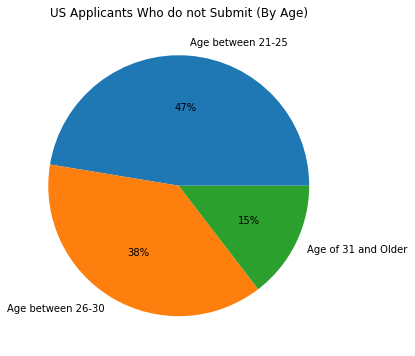

In [94]:
y = np.array([91, 73,  (192-91-73)])
mylabels = ["Age between 21-25", "Age between 26-30", "Age of 31 and Older"]
myexplode = [0.1, 0]
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(y, labels = mylabels, explode = None, autopct='%1.0f%%')
plt.title("US Applicants Who do not Submit (By Age)")
plt.show() 

In [61]:
nosub.groupby(['Sex']).size().sort_values(ascending=False)

Sex
M    64
F    29
dtype: int64

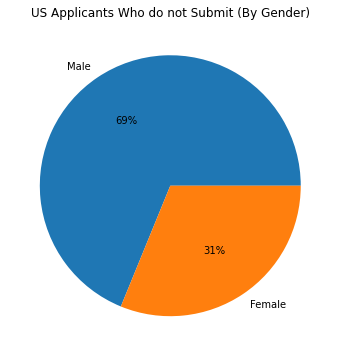

In [93]:
y = np.array([64,29])
mylabels = ["Male", "Female"]
myexplode = [0.1, 0]
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(y, labels = mylabels, explode = None, autopct='%1.0f%%')
plt.title("US Applicants Who do not Submit (By Gender)")
plt.show() 

In [66]:
nosub.groupby(['Currently Employed?']).size().sort_values(ascending=False)

Currently Employed?
No     187
Yes      5
dtype: int64

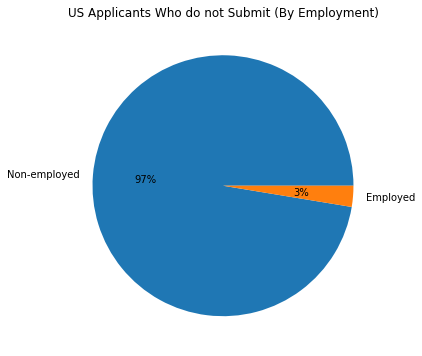

In [95]:
y = np.array([187,5])
mylabels = ["Non-employed", "Employed"]
myexplode = [0.1, 0]
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(y, labels = mylabels, explode = None, autopct='%1.0f%%')
plt.title("US Applicants Who do not Submit (By Employment)")
plt.show() 

In [68]:
nosub.groupby(['Current Student?']).size().sort_values(ascending=False)

Current Student?
No     184
Yes      8
dtype: int64

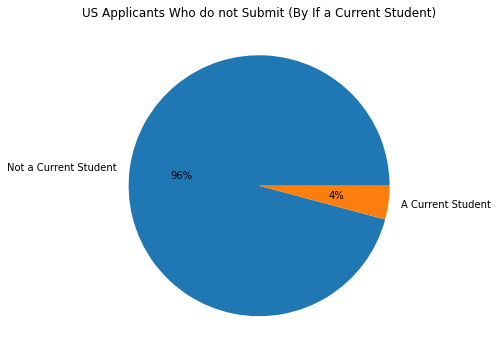

In [96]:
y = np.array([184,8])
mylabels = ["Not a Current Student", "A Current Student"]
myexplode = [0.1, 0]
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(y, labels = mylabels, explode = None, autopct='%1.0f%%')
plt.title("US Applicants Who do not Submit (By If a Current Student)")
plt.show() 

### How many schools do applicants say they typically apply to?
### What other schools did applicants say they were also applying to?

In [ ]:
admissions_data = pd.read_excel("Admissions_CLEAN.xlsx")
clearinghouse_data = pd.read_excel("CH_CLEAN.xlsx")

In [ ]:
capstone_whole_df = pd.read_excel('Capstone Dataset 20210608-183000.xlsx')

In [ ]:
other_schools_applied = capstone_whole_df[~capstone_whole_df['Other Schools Applying To'].isnull()]

In [ ]:
other_schools_applied = other_schools_applied[['Ref', 'Other Schools Applying To']]
other_schools_applied

In [ ]:
other_schools_applied['Ref'] = other_schools_applied['Ref'].apply(lambda x: x/1.0)

In [ ]:
other_schools_applied=other_schools_applied.rename(columns = {'Ref':'Ref ID'})

In [ ]:
other_schools_applied_merged_ch = other_schools_applied.join(clearinghouse_data.set_index('Ref ID'), on='Ref ID')

In [ ]:
other_schools_applied_merged_ch = other_schools_applied_merged_ch[~other_schools_applied_merged_ch['Rank Difference'].isnull()]


In [ ]:
other_schools_applied_merged_ch = other_schools_applied_merged_ch.reset_index(drop=True)

In [ ]:
num_schools_applied = []
for i in range(len(other_schools_applied_merged_ch)):
  tmp_num = other_schools_applied_merged_ch['Other Schools Applying To'][i].count(",") + 1
  num_schools_applied.append(tmp_num)


In [ ]:
other_schools_applied_merged_ch['num_schools_applied'] = num_schools_applied

In [ ]:
other_schools_applied_merged_ch['num_schools_applied'].value_counts()

In [ ]:
# Number of Students that Listed Other Schools Applied
num_schools = ['1', '2', '3', '4', '5', '6', '7', 'NA']
count = [618, 10, 8, 8, 6, 3, 2, 745]

New_Colors = ['green','blue','teal','brown','purple', 'orange', 'red', 'brown']
plt.bar(num_schools, count, color=New_Colors)
plt.title('Number of Students that Listed Other Schools Applied')
plt.xlabel('Number of Schools Applied')
plt.ylabel('Count')
plt.show()

In [ ]:
other_schools_applied_merged_ch_num_schools_1 = other_schools_applied_merged_ch.loc[other_schools_applied_merged_ch['num_schools_applied'] == 1]
other_schools_applied_merged_ch_num_schools_1['College Name'].value_counts()

In [ ]:
# Frequency of the School Applied for Students who Listed Only 1 Other School
colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'yellow', 'orange', 'red']
other_schools_applied_merged_ch_num_schools_1['College Name'].value_counts()[:15].sort_values().plot(kind = 'barh', color = colors)
plt.title('Frequency of the School Applied for Students who Listed Only 1 Other School')
plt.xlabel('Count')
plt.ylabel('School')
plt.show()

In [ ]:
other_schools_applied_merged_ch_num_schools_1['College State'].value_counts()

In [ ]:
# State of the School Applied for Students who Listed Only 1 Other School
plt.figure(figsize=(18,13))
other_schools_applied_merged_ch_num_schools_1['College State'].value_counts().sort_values().plot(kind = 'pie')
plt.title('State of the School Applied for Students who Listed Only 1 Other School')
percents = other_schools_applied_merged_ch_num_schools_1['College State'].value_counts().to_numpy() * 100 / other_schools_applied_merged_ch_num_schools_1['College State'].value_counts().to_numpy().sum()
plt.legend( bbox_to_anchor=(1.35,1.1), loc='upper right',
            labels=['%s, %1.1f %%' % (l, s) for l, s in zip(other_schools_applied_merged_ch_num_schools_1['College State'].value_counts().index,percents)])
